<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/C4_W1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Train Your Own Model and Serve It With TensorFlow Serving

In this notebook, you will train a neural network to classify images of handwritten digits from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. You will then save the trained model, and serve it using [TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving).

**Warning: This notebook is designed to be run in a Google Colab only**.  It installs packages on the system and requires root access. If you want to run it in a local Jupyter notebook, please proceed with caution.

## Setup

In [1]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import os
import json
import tempfile
import requests
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.12.0


## Import the MNIST Dataset

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains 70,000 grayscale images of the digits 0 through 9. The images show individual digits at a low resolution (28 by 28 pixels). 

Even though these are really images, we will load them as NumPy arrays and not as binary image objects.

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
# EXERCISE: Scale the values of the arrays below to be between 0.0 and 1.0.
train_images = train_images / 255.0
test_images = test_images / 225.0

In the cell below use the `.reshape` method to resize the arrays to the following sizes:

```python
train_images.shape: (60000, 28, 28, 1)
test_images.shape: (10000, 28, 28, 1)
```

In [13]:
# EXERCISE: Reshape the arrays below.
train_images = train_images.reshape(train_images.shape[0], 28,28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [14]:
print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


## Look at a Sample Image

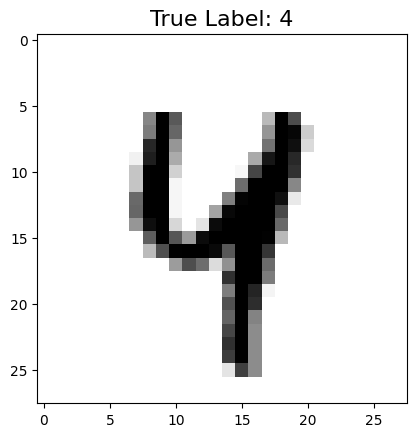

In [15]:
idx = 42

plt.imshow(test_images[idx].reshape(28,28), cmap=plt.cm.binary)
plt.title( {}'True Label:'.format(test_labels[idx]), fontdict={'size': 16})
plt.show()

## Build a Model

In the cell below build a `tf.keras.Sequential` model that can be used to classify the images of the MNIST dataset. Feel free to use the simplest possible CNN. Make sure your model has the correct `input_shape` and the correct number of output units.

In [16]:
# EXERCISE: Create a model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28, 1), filters=8, kernel_size=3,
                           strides=2, activation='relu', name='Conv1'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 13, 13, 8)         80        
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 Softmax (Dense)             (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In the cell below configure your model for training using the `adam` optimizer, `sparse_categorical_crossentropy` as the loss, and `accuracy` for your metrics. Then train the model for the given number of epochs, using the `train_images` array.

In [18]:
# EXERCISE: Configure the model for training.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 5

# EXERCISE: Train the model.
history = model.fit(train_images, train_labels, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 2.3016 - accuracy: 0.1113
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3014 - accuracy: 0.1124


## Evaluate the Model

In [19]:
# EXERCISE: Evaluate the model on the test images.
results_eval = model.evaluate(test_images, test_labels, verbose=0)
for metric, value in zip(model.metrics_names, results_eval):
    print(metric + ': {:.3}'.format(value))

loss: 2.3
accuracy: 0.113


## Save the Model

In [20]:
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


export_path = /tmp/1
total 112
drwxr-xr-x 2 root root  4096 May 12 09:41 assets
-rw-r--r-- 1 root root    55 May 12 09:41 fingerprint.pb
-rw-r--r-- 1 root root  8612 May 12 09:41 keras_metadata.pb
-rw-r--r-- 1 root root 89982 May 12 09:41 saved_model.pb
drwxr-xr-x 2 root root  4096 May 12 09:41 variables


## Examine Your Saved Model

In [21]:
!saved_model_cli show --dir {export_path} --all

2023-05-12 09:45:00.410813: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Softmax'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

## Add TensorFlow Serving Distribution URI as a Package Source

In [22]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   2561      0  0:00:01  0:00:01 --:--:--  2563
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://storage.g

## Install TensorFlow Serving

In [23]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 430 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.12.1 [430 MB]
Fetched 430 MB in 23s (18.9 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.12.1_all.deb ...
Unpacking tensorflow-model-server (2.12.1) ...
Setting up tensorflow-model-server (2.12.1) ...


## Run the TensorFlow Model Server

You will now launch the TensorFlow model server with a bash script. In the cell below use the following parameters when running the TensorFlow model server:

* `rest_api_port`: Use port `8501` for your requests.


* `model_name`: Use `digits_model` as your model name. 


* `model_base_path`: Use the environment variable `MODEL_DIR` defined below as the base path to the saved model.

In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [24]:
# EXERCISE: Fill in the missing code below.
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port= 8501 \
  --model_name= digits_model \
  --model_base_path= "${MODEL_DIR}" >server.log 2>&1

In [25]:
!tail server.log

	--version=false                  	bool	Display version
	--monitoring_config_file=""      	string	If non-empty, read an ascii MonitoringConfig protobuf from the supplied file name
	--remove_unused_fields_from_bundle_metagraph=true	bool	Removes unused fields from MetaGraphDef proto message to save memory.
	--prefer_tflite_model=false      	bool	EXPERIMENTAL; CAN BE REMOVED ANYTIME! Prefer TensorFlow Lite model from `model.tflite` file in SavedModel directory, instead of the TensorFlow model from `saved_model.pb` file. If no TensorFlow Lite model found, fallback to TensorFlow model.
	--num_tflite_pools=2             	int32	EXPERIMENTAL; CAN BE REMOVED ANYTIME! Number of TFLite interpreters in an interpreter pool of TfLiteSession. Typically there is one TfLiteSession for each TF Lite model that is loaded. If not set, will be auto set based on number of CPUs.
	--num_tflite_interpreters_per_pool=1	int32	EXPERIMENTAL; CAN BE REMOVED ANYTIME! Number of TFLite interpreters in an interpreter po

## Create JSON Object with Test Images

In the cell below construct a JSON object and use the first three images of the testing set (`test_images`) as your data.

In [26]:
# EXERCISE: Create JSON Object
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})

## Make Inference Request

In the cell below, send a predict request as a POST to the server's REST endpoint, and pass it your test data. You should ask the server to give you the latest version of your model.

In [ ]:
# EXERCISE: Fill in the code below
headers = {"content-type": "application/json"}
json_response = requests.post('http://192.168.1.1:8501/v1/models/digits_model:predict', data=data, headers=headers)

predictions = json.loads(json_response.text)['predictions']

## Plot Predictions

In [ ]:
plt.figure(figsize=(10,15))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap = plt.cm.binary)
    plt.axis('off')
    color = 'green' if np.argmax(predictions[i]) == test_labels[i] else 'red'
    plt.title('Prediction: {}\nTrue Label: {}'.format(np.argmax(predictions[i]), test_labels[i]), color=color)
    
plt.show()